In [24]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt  
%matplotlib inline

In [25]:
zoo = pd.read_csv('zoo.csv')

In [26]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### Extacting unique number of high-level classes
- Plot the unique number of labels obtained using the matplotlib
- 7 unique class labels

[1 2 3 4 5 6 7]


<AxesSubplot: >

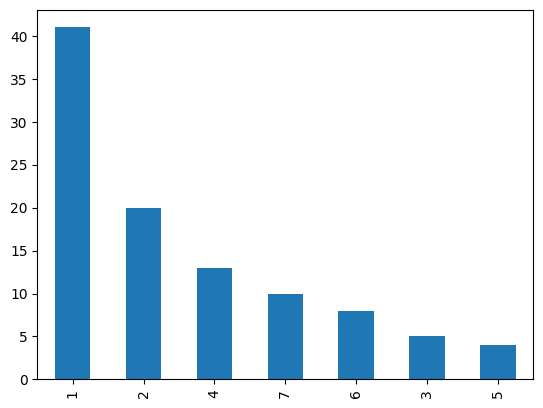

In [27]:
labels = zoo ['class_type'] 
print(np.unique(labels.values))

fig, ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

### Clustering

In [28]:
zoo.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


- Extract the features leaving the labels column and store them in another data frame

In [29]:
features = zoo.values[:,1:-1]
features.shape

(101, 16)

- Specify the total number of clusters as seven
- There are seven uniques class labels
- Specify the linkage method as avg
- Similiarity method as cosine

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import warnings #only for osx
warnings.filterwarnings("ignore") #only for osx

model = AgglomerativeClustering(n_clusters=7,linkage='average', affinity='cosine')

- Fit 50 agglomerative clustering model over the feature variable

In [31]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

- Extact the labels predicted by the model against the features

In [32]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

- Predicted lables against all 101 animals
- Subtract one from orginal label column that it matches the predicted numbers.

In [33]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [34]:
lables = labels-1

- Predict the accuracy of the model
- Considering the prediting parameter as mean squared error

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
score = mean_squared_error(labels,model.labels_)

- Evaluate the absolute error
- Apply square root operation

In [22]:
abs_error = np.sqrt(score)
print(abs_error)

3.1165479760672246
